In [5]:

import numpy as np
import matplotlib.pyplot as plt


class perceptron():
    def __init__(self,features):
        self.num_features = features
        self.weights = np.zeros(features)

    def output(self, data):
        return 1 if np.dot(data, self.weights) >= 0 else 0

    def reversed_output(self, data):
        return 0 if np.dot(data, self.weights) >= 0 else 1

    def simple_gradient_train(self, epochs, X_train, y_train, learning_rate):
        k, n = X_train.shape  # Получаем размерности X_train
    
        for epoch in range(epochs):
    
            total_train_error = 0  # Суммарная ошибка на обучающей выборке на текущей эпохе
    
            for i in range(k):
                # Вычисление выхода нейросети
                inputs = np.append(X_train[i], 1)
                output = self.output(inputs)
                
                 # Вычисление ошибки с использованием производной сигмоидной функции
                error = y_train[i] - output
                total_train_error += abs(error)
                
                # Обновление весов и смещения с помощью градиентного спуска
                W += learning_rate * error * inputs
    
            # Округляем ошибку до ближайшего множителя 0.0001
            total_train_error_rounded = np.round(total_train_error, 4)   
            print(f"Epoch {epoch + 1}/{epochs}, Train Error: {total_train_error_rounded}")
                
            return train_errors
        

def create_perceptron(k,bias):
    ppn = perceptron(3)
    ppn.weights = np.array([-k, 1, -bias])
    return ppn

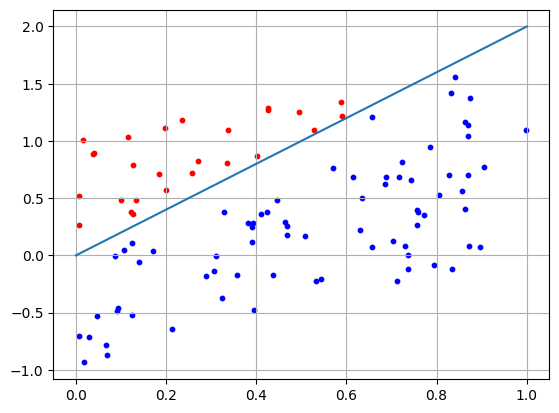

In [6]:
# удобная функция для создания персептрона, который задает прямую y= k*x + bias

# позволяет показать нашу гиперплоскость
def draw_line(perceptron):
    w= perceptron.weights
    f = [ -w[2]/w[1], -1*w[0]/w[1]-w[2]/w[1]]
    plt.plot(f)

# эта функция рисует разделяющую гиперплоскость а так же данные разделяя их на классы
def draw_line_with_info(X, perceptron):    
    draw_line(perceptron)
    for i in range(N):
        x = np.array([X[0][i], X[1][i], 1])
        y = perceptron.output(x)
        if y == 0 :
            plt.scatter(X[0][i], X[1][i], s = 10, c ='blue')
        else:
            plt.scatter(X[0][i], X[1][i], s = 10, c ='red')

#опишем случайное множество точек на [0,1]
N = 100
x1 = np.random.random(N)
x2 = x1 + [(np.random.random()-0.5)*2 for i in range(N)] + 0.01
X = [x1,x2]

w = create_perceptron(2,0)

draw_line_with_info(X, w)
plt.grid(True)
plt.show()

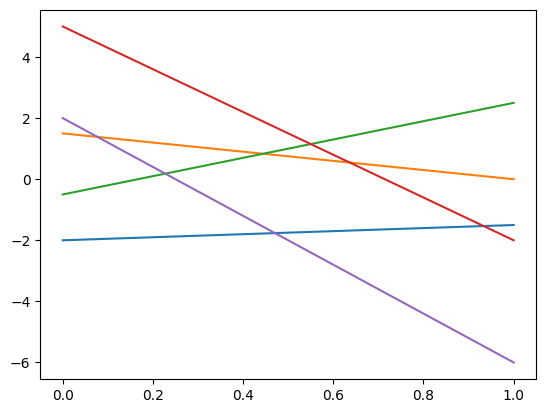

In [7]:
w1 = create_perceptron(0.5 , -2)
w2 = create_perceptron(-1.5, 1.5)
w3 = create_perceptron(3, -0.5)
w4 = create_perceptron(-7, 5)
w5 = create_perceptron(-8, 2)
W_polygon = [w1, w2, w3, w4, w5]
Top = [0,1,1,1,0]

def draw_lines(W):
    for w in W:
      draw_line(w)

draw_lines(W_polygon)

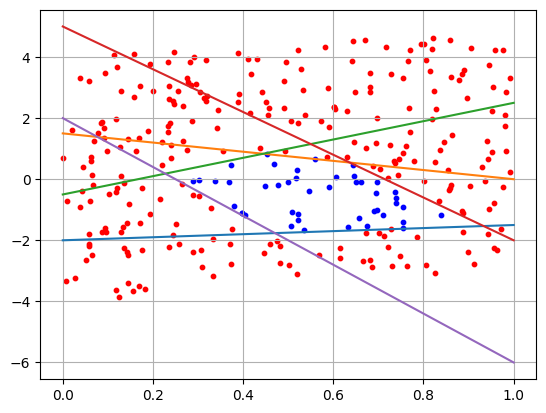

In [8]:
def get_points_in_polygon(W,Top, X):
    
    draw_lines(W)
    for i in range(N):
        x = np.array([X[0][i], X[1][i], 1])
        bool = []
        for k, w in enumerate(W):
            if Top[k] ==1:
                bool.append(w.output(x))
            else:
                bool.append(w.reversed_output(x))
                
        if all(x == 0 for x in bool):
            plt.scatter(X[0][i], X[1][i], s = 10, c ='blue')
        else:
            plt.scatter(X[0][i], X[1][i], s = 10, c ='red')
        bool = []

N = 300
x1 = np.random.random(N)
x2 = x1 + [(np.random.random()-0.5)*8 for i in range(N)] + 0.01
X = [x1, x2]

get_points_in_polygon(W_polygon, Top, X)

plt.grid(True)
plt.show()

In [9]:
#######################################################################################################################################################
#######################################################################################################################################################
#                                                                 теперь c pytorch
#######################################################################################################################################################
#######################################################################################################################################################

In [10]:
import torch

class Perceptron:
    def __init__(self, features):
        self.num_features = features
        self.weights = torch.zeros(features, dtype=torch.float32)

    def output(self, data):
        dot_product = torch.dot(data, self.weights)
        return 1 if dot_product >= 0 else 0

    def reversed_output(self, data):
        dot_product = torch.dot(data, self.weights)
        return 0 if dot_product >= 0 else 1

def create_perceptron(k, bias):
    ppn = Perceptron(3)
    ppn.weights = torch.tensor([-k, 1, -bias], dtype=torch.float32)
    return ppn






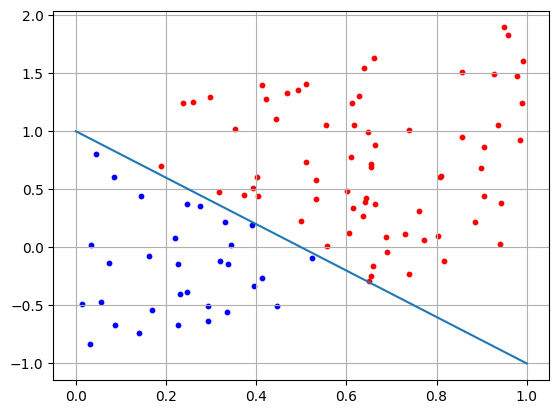

In [11]:
# Функция для отображения разделяющей гиперплоскости и данных
def draw_line_with_info(X, perceptron):    
    draw_line(perceptron)
    for i in range(N):
        x = torch.tensor([X[0][i], X[1][i], 1], dtype=torch.float32)
        y = perceptron.output(x)
        if y == 0 :
            plt.scatter(X[0][i], X[1][i], s=10, c='blue')
        else:
            plt.scatter(X[0][i], X[1][i], s=10, c='red')

# Функция для отображения разделяющей гиперплоскости
def draw_line(perceptron):
    w = perceptron.weights
    f = [-w[2]/w[1], -1*w[0]/w[1]-w[2]/w[1]]
    plt.plot(f)

# Определение случайного множества точек на [0,1]
N = 100
x1 = torch.rand(N)
x2 = x1 + (torch.rand(N) - 0.5) * 2 + 0.01
X = [x1, x2]

# Создание перцептрона с заданными параметрами
w = create_perceptron(-2, 1)

# Отображение разделяющей гиперплоскости и данных
draw_line_with_info(X, w)
plt.grid(True)
plt.show()

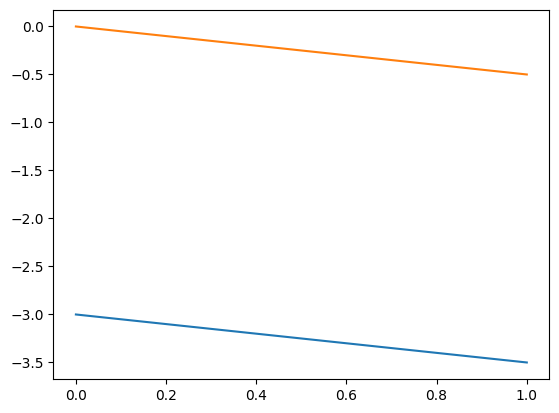

In [12]:
w1 = create_perceptron(-0.5 , -3)
w2 = create_perceptron(-0.5, -0)
#w5 = create_perceptron(-8, 2)
W_polygon = [w1, w2]
Top = [0,1]

def draw_lines(W):
    for w in W:
      draw_line(w)

draw_lines(W_polygon)

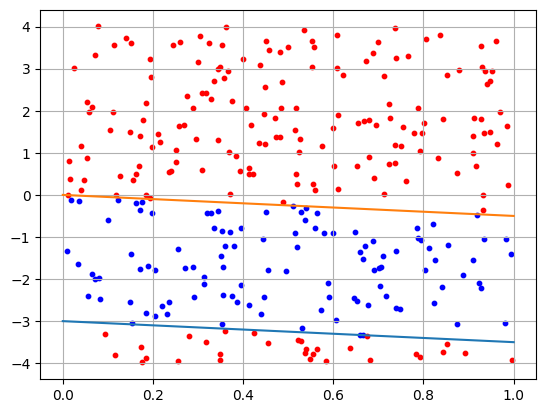

In [13]:
# Функция для классификации точек внутри или вне многоугольника
def get_points_in_polygon(W, Top, X):
    draw_lines(W)
    for i in range(N):
        x = torch.tensor([X[0][i], X[1][i], 1], dtype=torch.float32)
        bool_list = []
        for k, w in enumerate(W):
            if Top[k] == 1:
                bool_list.append(w.output(x))
            else:
                bool_list.append(w.reversed_output(x))
                
        if all(x == 0 for x in bool_list):
            plt.scatter(X[0][i], X[1][i], s=10, c='blue')
        else:
            plt.scatter(X[0][i], X[1][i], s=10, c='red')

N = 300
x1 = torch.rand(N)
x2 = (torch.rand(N) - 0.5) * 8 + 0.01
X = [x1, x2]

# Вызов функции для классификации точек
get_points_in_polygon(W_polygon, Top, X)

# Отображение графика
plt.grid(True)
plt.show()

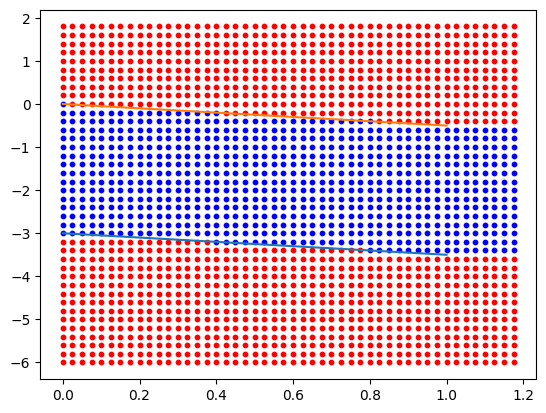

In [14]:
x_range = torch.arange(0, 1.2, 0.025) 
y_range = torch.arange(-6, 2, 0.2) 

points = [(x, y) for x in x_range for y in y_range]

# Функция для классификации точек внутри или вне многоугольника
def get_points_in_polygon(W, Top, X):
    draw_lines(W)
    for point in X:
        x = torch.tensor([point[0], point[1], 1], dtype=torch.float32)
        bool_list = []
        for k, w in enumerate(W):
            if Top[k] == 1:
                bool_list.append(w.output(x))
            else:
                bool_list.append(w.reversed_output(x))
                
        if all(val == 0 for val in bool_list):
            plt.scatter(point[0], point[1], s=10, c='blue')
        else:
            plt.scatter(point[0], point[1], s=10, c='red')
        bool_list = []
        
get_points_in_polygon(W_polygon, Top, points)

In [62]:
class perceptron():
    def __init__(self,features):
        self.num_features = features
        self.weights = np.zeros(features)

    def output(self, data):
        return 1 if np.dot(data, self.weights) >= 0 else 0

    def reversed_output(self, data):
        return 0 if np.dot(data, self.weights) >= 0 else 1

    def simple_gradient_train(self, epochs, X_train, y_train, learning_rate):

        k, n = X_train.shape  # Получаем размерности X_train
    
        for epoch in range(epochs):
    
            total_train_error = 0  # Суммарная ошибка на обучающей выборке на текущей эпохе
    
            for i in range(k):
                # Вычисление выхода нейросети
                inputs = np.append(X_train[i], 1)
                output = self.output(inputs)
                
                 # Вычисление ошибки с использованием производной сигмоидной функции
                error = y_train[i] - output
                total_train_error += abs(error)
                
                # Обновление весов и смещения с помощью градиентного спуска
                self.weights = self.weights.astype(np.float64)
                self.weights += learning_rate * error * inputs
    
            # Округляем ошибку до ближайшего множителя 0.0001
            total_train_error_rounded = np.round(total_train_error, 4)   
            print(f"Epoch {epoch + 1}/{epochs}, Train Error: {total_train_error_rounded}")
  
        

def create_perceptron(k,bias):
    ppn = perceptron(3)
    ppn.weights = np.array([-k, 1, -bias])
    return ppn

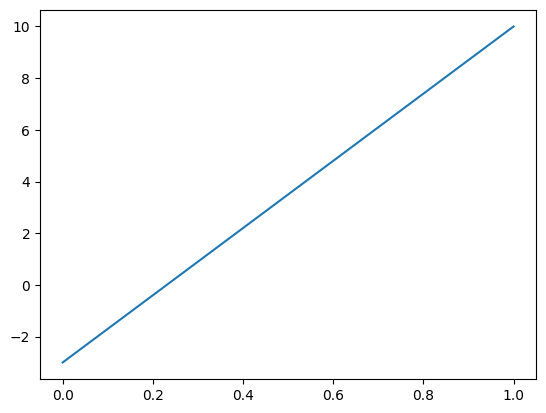

In [65]:
ppn = create_perceptron(13,-3)
draw_line(ppn)

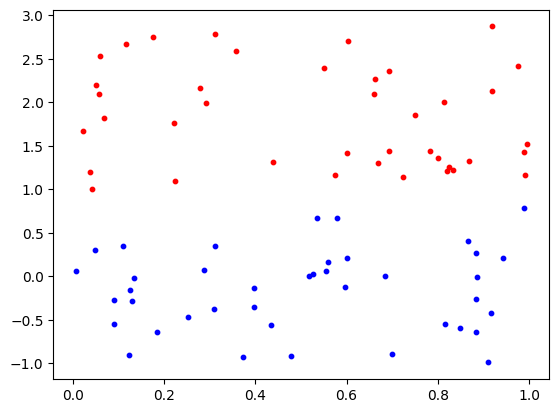

In [66]:
m = 40  # Замените на желаемое количество точек

# Генерируем случайные значения x и y для C1
x_values = np.random.uniform(0, 1, m)
y_values = np.random.uniform(1, 3, m)

# Создаем массив точек C1 в формате (x, y)
C1 = np.column_stack((x_values, y_values))
с1_labels = np.ones(m)

# Генерируем случайные значения x и y для C2
x_values = np.random.uniform(0, 1, m)
y_values = np.random.uniform(-1, 0.8, m)

# Создаем массив точек C2 в формате (x, y)
C2 = np.column_stack((x_values, y_values))
с2_labels = np.zeros(m)

# Объединяем оба набора точек и меток
Points = np.vstack((C1, C2))
labels = np.concatenate((с1_labels, с2_labels))

def draw_points(Points, labels):
    for i, point in enumerate(Points):
        if labels[i] == 0:
            plt.scatter(point[0], point[1], s=10, c='blue')
        else:
            plt.scatter(point[0], point[1], s=10, c='red')

draw_points(Points, labels)
plt.show()


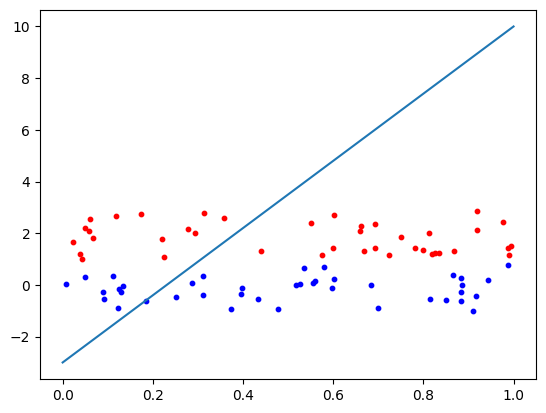

In [67]:
def draw_line_with_points(Points, labels, W):
    draw_points(Points, labels)
    draw_line(W)

draw_line_with_points(Points, labels, ppn)

In [70]:
ppn.simple_gradient_train(100, Points, labels,0.01)

Epoch 1/100, Train Error: 34.0
Epoch 2/100, Train Error: 32.0
Epoch 3/100, Train Error: 29.0
Epoch 4/100, Train Error: 29.0
Epoch 5/100, Train Error: 25.0
Epoch 6/100, Train Error: 23.0
Epoch 7/100, Train Error: 21.0
Epoch 8/100, Train Error: 20.0
Epoch 9/100, Train Error: 20.0
Epoch 10/100, Train Error: 19.0
Epoch 11/100, Train Error: 20.0
Epoch 12/100, Train Error: 20.0
Epoch 13/100, Train Error: 19.0
Epoch 14/100, Train Error: 19.0
Epoch 15/100, Train Error: 18.0
Epoch 16/100, Train Error: 18.0
Epoch 17/100, Train Error: 18.0
Epoch 18/100, Train Error: 17.0
Epoch 19/100, Train Error: 18.0
Epoch 20/100, Train Error: 18.0
Epoch 21/100, Train Error: 17.0
Epoch 22/100, Train Error: 16.0
Epoch 23/100, Train Error: 16.0
Epoch 24/100, Train Error: 14.0
Epoch 25/100, Train Error: 14.0
Epoch 26/100, Train Error: 14.0
Epoch 27/100, Train Error: 14.0
Epoch 28/100, Train Error: 14.0
Epoch 29/100, Train Error: 13.0
Epoch 30/100, Train Error: 13.0
Epoch 31/100, Train Error: 13.0
Epoch 32/100, Tra

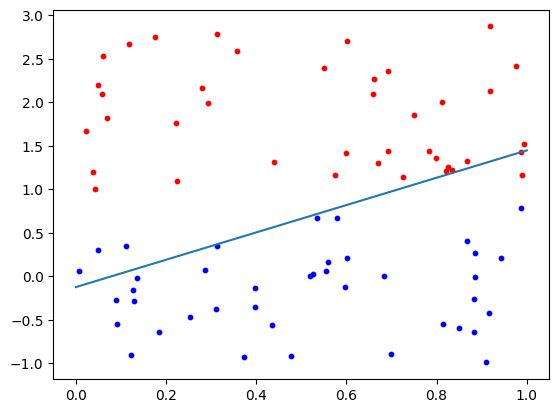

In [71]:
def draw_line_with_points(Points, labels, W):
    draw_points(Points, labels)
    draw_line(W)

draw_line_with_points(Points, labels, ppn)